In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

In [ ]:
news1=pd.read_csv("/content/DN2 newscsv.csv")
news1


,FICE(ID NUM),COLLEGE NAME,POSTAL CODE,PUB/PRIVATE,AVG MATH SCORE,AVG VERBAL SCORE,AVG COMBINED SCORE,AVG ACT SCORE,1st Quartile maths,3rd quartile maths,...,Board costs,Additional fees,Estimated book costs,Estimated personal spending,Pct. of faculty with Ph.D.'s,Pct. of faculty with terminal degree,Student/faculty ratio,Pct.alumni who donate,Instructional expenditure per student,Graduation rate
0,2909,Barber Scotia College,NC,2,320,280,600,*,220,370,...,1466,295,736,2100,50,50,13.5,8,4431,34
1,3638,Texas College,TX,2,330,290,620,16,*,*,...,850,455,300,300,37,44,18.4,*,4800,26
2,3637,Jarvis Christian College,TX,2,341,316,657,11,*,*,...,1510,285,350,*,48,48,12.1,*,*,25
3,10097,CUNY- Medgar Evers College,NY,1,340,320,660,*,280,370,...,*,70,500,2700,64,76,16.5,*,6324,36
4,3766,Virginia Union University,VA,2,343,317,660,*,*,*,...,*,458,500,1763,51,67,13.7,8,6757,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,3820,Salem-Teikyo University,WV,2,*,*,*,22,370,580,...,2352,*,400,620,46,24,13,9,8946,98
1298,3823,West Liberty State College,WV,1,*,*,*,19,*,*,...,*,*,600,1210,33,33,16.3,10,4249,60
1299,3825,West Virginia Institute of Technology,WV,1,*,*,*,20,*,*,...,1952,*,500,*,*,31,15.3,*,4325,56
1300,3826,West Virginia State College,WV,1,*,*,*,18,*,*,...,1700,50,750,750,38,38,19.2,4,3839,*


p_pub 0.36098
p_priv 0.63902


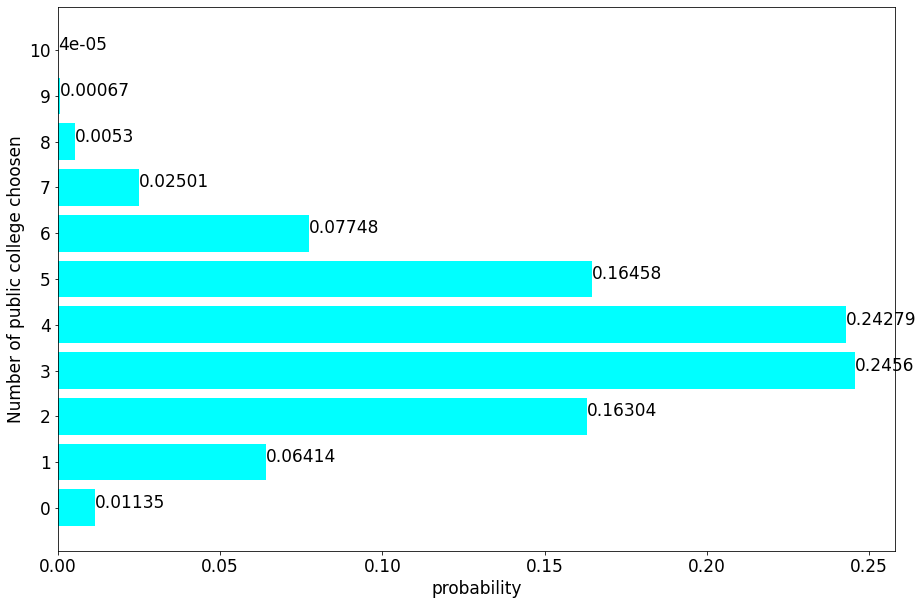

In [ ]:
## What is the likelihood of selecting a public school if I choose 10 schools at random from the dataset?


news1=pd.read_csv("/content/DN2 newscsv.csv")
df=pd.DataFrame()
df["type"]=news1["PUB/PRIVATE"]
df["PRIVATE"]=np.where((df["type"]==2),1,0)
df["public"]=np.where((df["type"]==1),1,0)
totalpub=sum(df["public"])
totalpriv=sum(df["PRIVATE"])
total=totalpub+totalpriv

p_pub=totalpub/total
p_pub=round(p_pub,5)
print("p_pub",p_pub)

p_priv=totalpriv/total
p_priv=round(p_priv,5)
print("p_priv",p_priv)
n=10
r=list(range(n+1))

h=binom.pmf(r,n,p_pub)
for i in range(len(h)):
  h[i]=round(h[i],5)
plt.figure(figsize=(15,10))
plt.barh(r,h,color="cyan")
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
for index, value in enumerate(h):
    plt.text(value, index,
             str(value))
plt.xlabel("probability")
plt.ylabel("Number of public college choosen")


plt.show()







<class 'pandas.core.series.Series'>


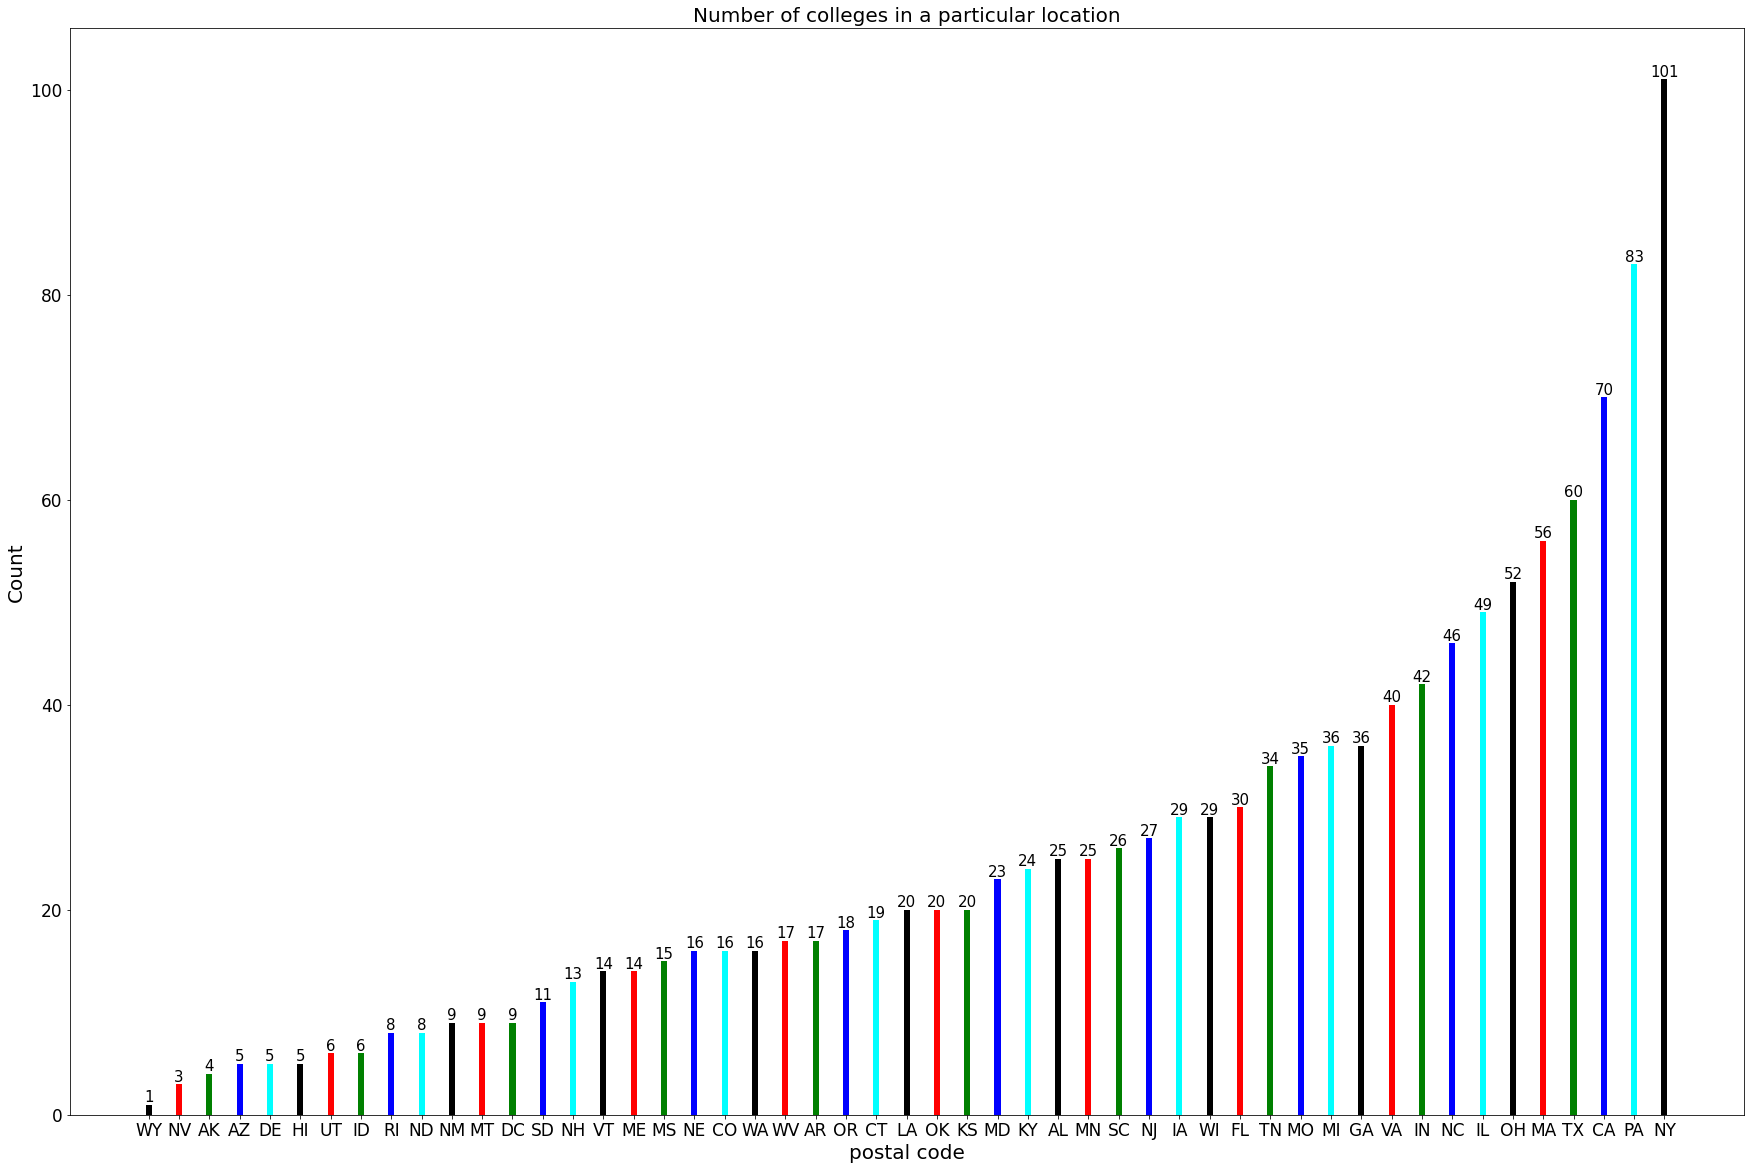

In [ ]:
##  NUMBER OF COLLEGES IN DIFFERENT AREA OF AMERICA

news1=pd.read_csv("/content/DN2 newscsv.csv")
news1
df=pd.DataFrame()
df["postal"]=news1["POSTAL CODE"]
df2=df.pivot_table(index="postal",aggfunc="size")
df2=df2.sort_values(ascending=True)

print(type(df2))
fig, ax = plt.subplots(figsize=(30,20))
bars = ax.bar(df2.index, df2.values,color=['black', 'red', 'green', 'blue', 'cyan'],width=0.2)

ax.bar_label(bars,fontsize=15)
plt.rcParams['font.size'] = 17
ax.set_title("Number of colleges in a particular location",fontsize="20")
ax.set_xlabel("postal code",fontsize="20")
ax.set_ylabel("Count",fontsize="20")

plt.show()


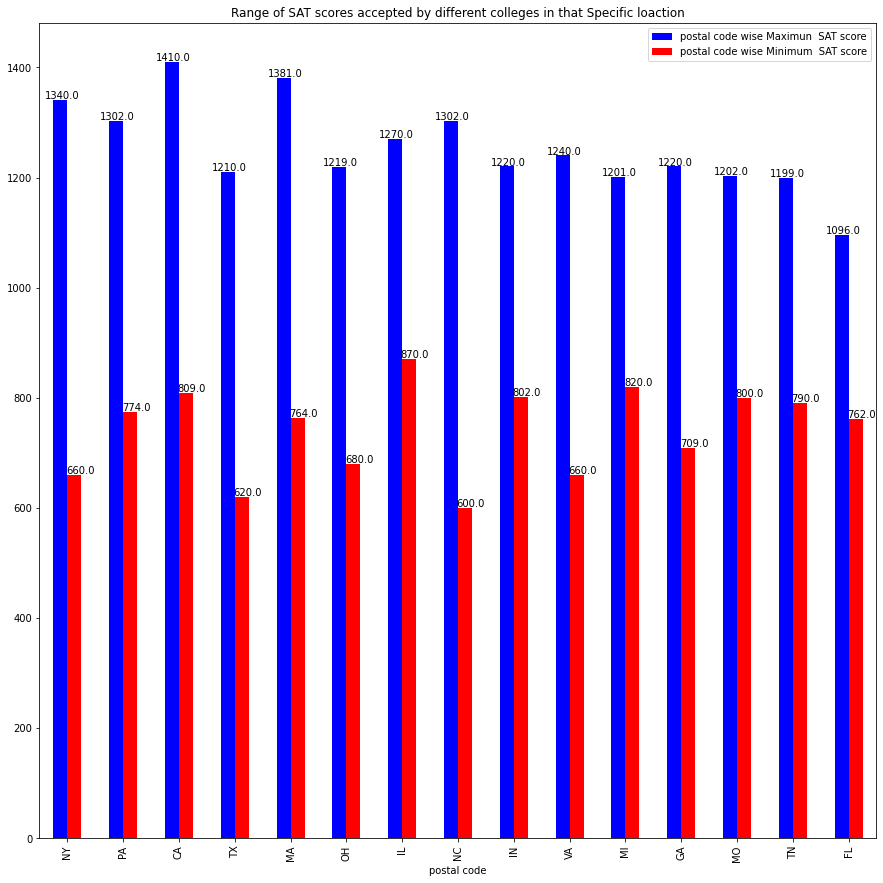

In [ ]:
## what is the range of SAT scores accepted by various institutions across America?

news1=pd.read_csv("/content/DN2 newscsv.csv")
news1
df2=pd.DataFrame()
df2["postal code"]=news1["POSTAL CODE"]
df=df2.pivot_table(index="postal code",aggfunc="size")
df2["score"]=news1["AVG COMBINED SCORE"]

df2["score"]=df2["score"].replace("*",None)
df2["score"]=pd.to_numeric(df2["score"])
max1=df2.groupby(["postal code"]).max()
min1=df2.groupby(["postal code"]).min()

max1=max1.sort_values(["score"],ascending=False)
min1=min1.sort_values(["score"],ascending=False)


df=df.sort_values(ascending=False)

f=pd.DataFrame()
f["Total mumber of uinversity"]=df
f["postal code wise Maximun  SAT score"]=max1
f["postal code wise Minimum  SAT score"]=min1
f=f.drop(["Total mumber of uinversity"],axis=1)
f=f.head(15)



ax =f.plot(kind='bar',figsize=(15,15),color=["b","r"])

for i, col in enumerate(f.columns):
    for j, value in enumerate(f[col]):
        
        label = f"{value:.1f}"  
        ax.annotate(label, xy=(j+i*0.33-0.1, value+2), ha='center')
ax.set_title("Range of SAT scores accepted by different colleges in that Specific loaction")
plt.show()





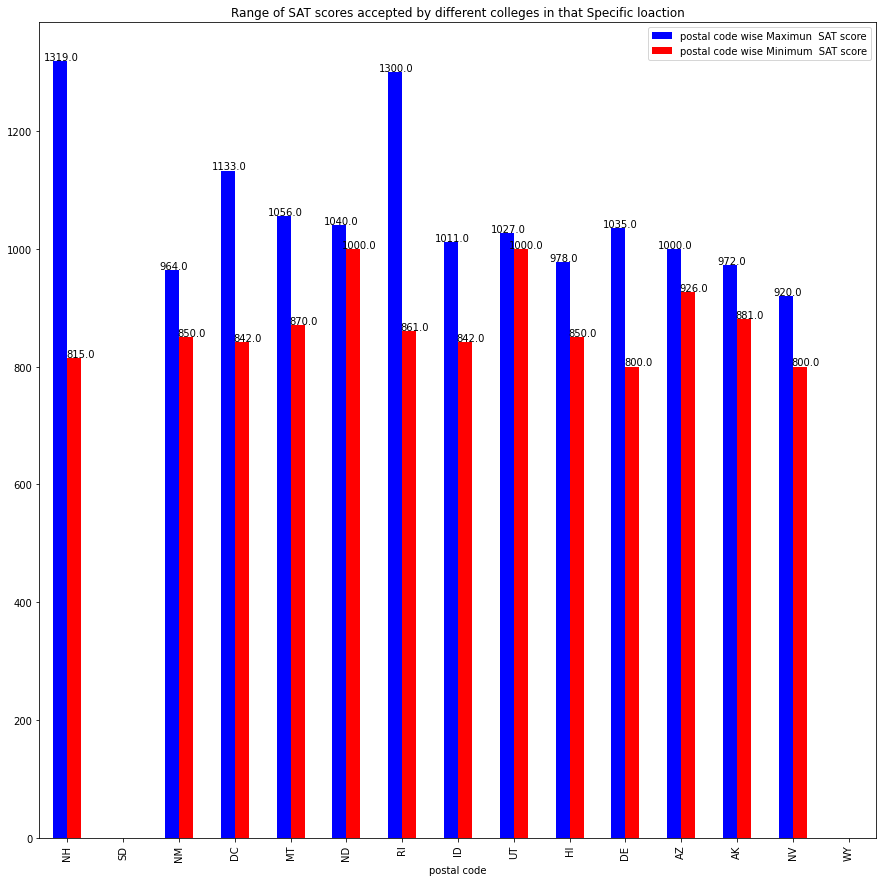

In [ ]:
news1=pd.read_csv("/content/DN2 newscsv.csv")
news1
df2=pd.DataFrame()
df2["postal code"]=news1["POSTAL CODE"]
df=df2.pivot_table(index="postal code",aggfunc="size")
df2["score"]=news1["AVG COMBINED SCORE"]

df2["score"]=df2["score"].replace("*",None)
df2["score"]=pd.to_numeric(df2["score"])
max1=df2.groupby(["postal code"]).max()
min1=df2.groupby(["postal code"]).min()

max1=max1.sort_values(["score"],ascending=False)
min1=min1.sort_values(["score"],ascending=False)


df=df.sort_values(ascending=False)

f=pd.DataFrame()
f["Total mumber of uinversity"]=df
f["postal code wise Maximun  SAT score"]=max1
f["postal code wise Minimum  SAT score"]=min1
f=f.drop(["Total mumber of uinversity"],axis=1)
f=f.tail(15)



ax =f.plot(kind='bar',figsize=(15,15),color=["b","r"])

for i, col in enumerate(f.columns):
    for j, value in enumerate(f[col]):
        
        label = f"{value:.1f}"  
        ax.annotate(label, xy=(j+i*0.33-0.1, value+2), ha='center')
ax.set_title("Range of SAT scores accepted by different colleges in that Specific loaction")
plt.show()


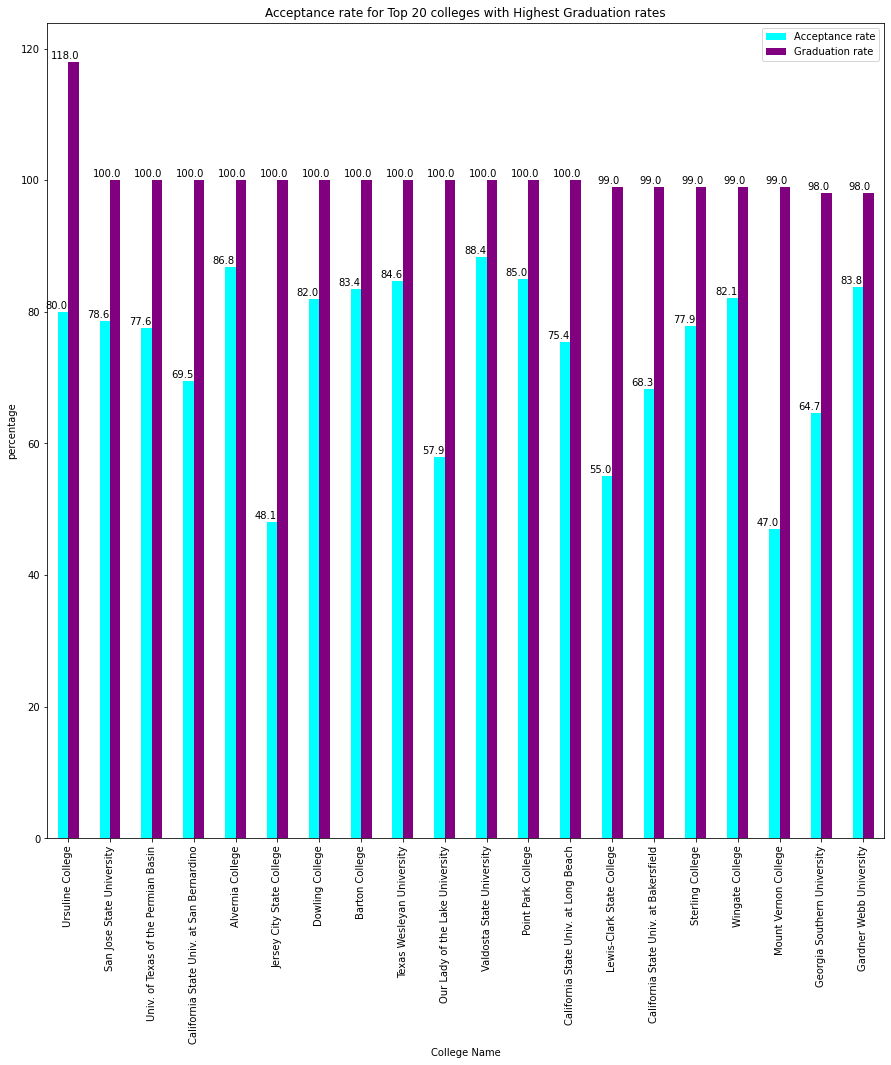

In [ ]:
## Do colleges with high graduation rates make it harder to get accepted?

news1=pd.read_csv("/content/DN2 newscsv.csv")
news1
df=pd.DataFrame()
df["Number of applicants accepted"]=news1["Number of applicants accepted"]
df["Number of applicants accepted"]=df["Number of applicants accepted"].replace("*",None)
df["Number of applications received"]=news1["Number of applications received"]
df["Number of applications received"]=df["Number of applications received"].replace("*",None)
df["Number of applications received"]=pd.to_numeric(df["Number of applications received"])
df["Number of applicants accepted"]=pd.to_numeric(df["Number of applicants accepted"])

df["Acceptance rate"]=(df["Number of applicants accepted"]/df["Number of applications received"])*100
df["Graduation rate"]=news1["Graduation rate"]
df["Graduation rate"]=df["Graduation rate"].replace("*",None)
df["Graduation rate"]=pd.to_numeric(df["Graduation rate"])
df["Name"]=news1["COLLEGE NAME"]
df=df.sort_values(["Graduation rate"],ascending=False)
df=df.head(20)

df=df.drop(["Number of applications received"],axis=1)
df=df.drop(["Number of applicants accepted"],axis=1)
df.set_index('Name', inplace=True)

ax = df.plot(kind='bar',figsize=(15,15),color=["cyan","purple"])

for i, col in enumerate(df.columns):
    for j, value in enumerate(df[col]):
        
        label = f"{value:.1f}"  
        ax.annotate(label, xy=(j+i*0.2-0.28, value+0.5), ha='center')




ax.set_xlabel('College Name')

ax.set_title('Acceptance rate for Top 20 colleges with Highest Graduation rates')
ax.set_ylabel("percentage")
plt.show()







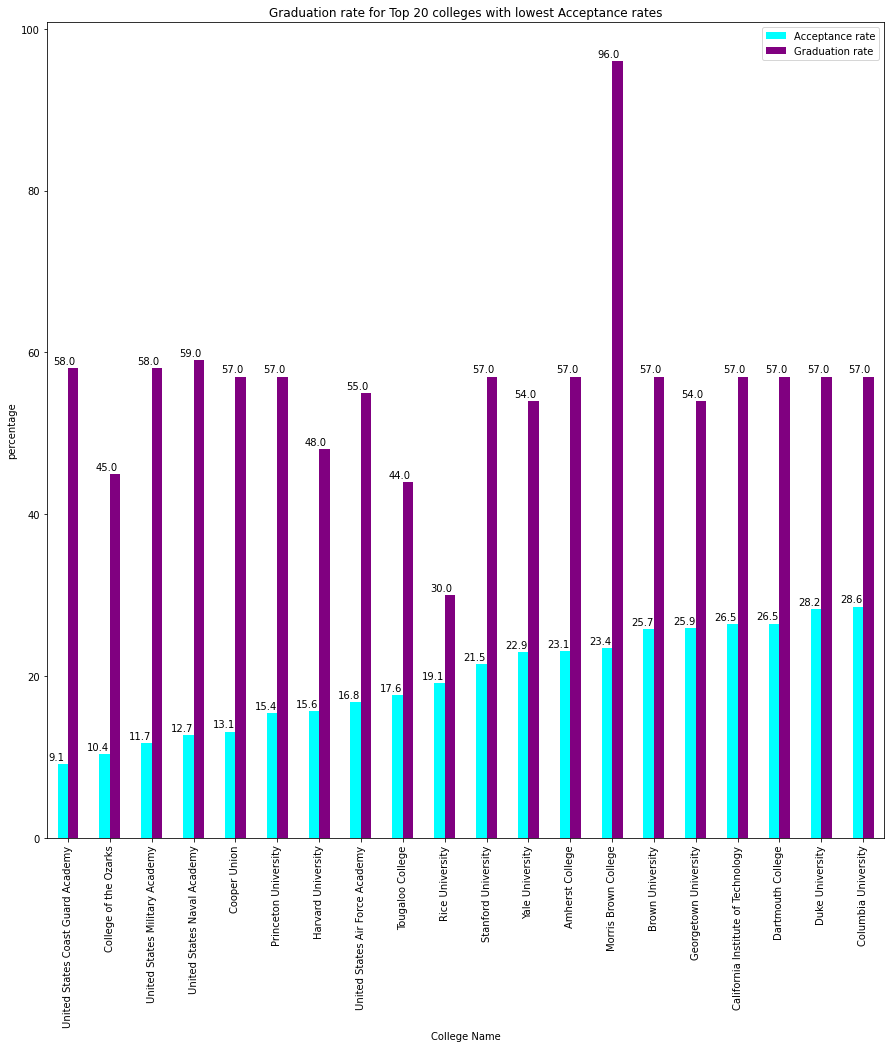

In [ ]:


news1=pd.read_csv("/content/DN2 newscsv.csv")
news1
df=pd.DataFrame()
df["Number of applicants accepted"]=news1["Number of applicants accepted"]
df["Number of applicants accepted"]=df["Number of applicants accepted"].replace("*",None)
df["Number of applications received"]=news1["Number of applications received"]
df["Number of applications received"]=df["Number of applications received"].replace("*",None)
df["Number of applications received"]=pd.to_numeric(df["Number of applications received"])
df["Number of applicants accepted"]=pd.to_numeric(df["Number of applicants accepted"])

df["Acceptance rate"]=(df["Number of applicants accepted"]/df["Number of applications received"])*100
df["Graduation rate"]=news1["Graduation rate"]
df["Graduation rate"]=df["Graduation rate"].replace("*",None)
df["Graduation rate"]=pd.to_numeric(df["Graduation rate"])
df["Name"]=news1["COLLEGE NAME"]

df=df.sort_values(["Acceptance rate"],ascending=True)
df=df.head(20)

df=df.drop(["Number of applications received"],axis=1)
df=df.drop(["Number of applicants accepted"],axis=1)
df.set_index('Name', inplace=True)

ax = df.plot(kind='bar',figsize=(15,15),color=["cyan","purple"])

for i, col in enumerate(df.columns):
    for j, value in enumerate(df[col]):
        
        label = f"{value:.1f}"  
        ax.annotate(label, xy=(j+i*0.2-0.28, value+0.5), ha='center')




ax.set_xlabel('College Name')

ax.set_title('Graduation rate for Top 20 colleges with lowest Acceptance rates')
ax.set_ylabel("percentage")
plt.show()

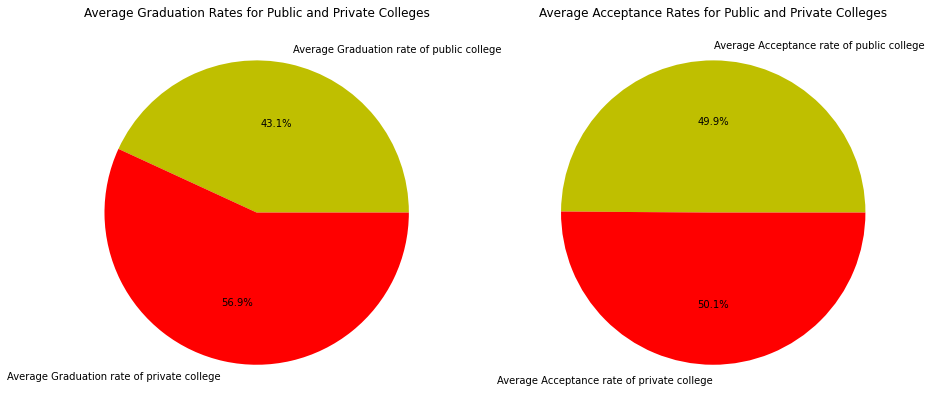

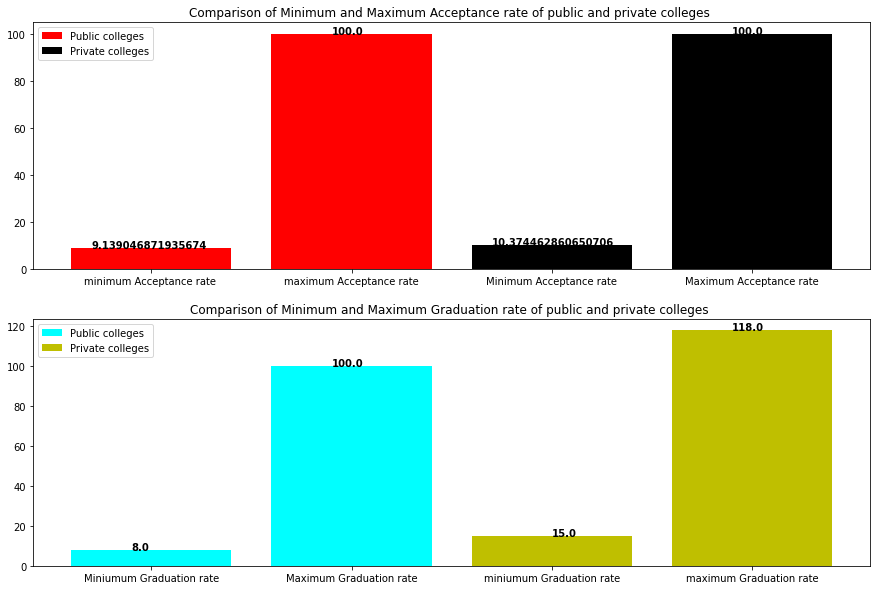

In [ ]:
## Comparison of average graduation and acceptance rates as well as maximum and minimum graduation and acceptance rates between public and private universities
news1=pd.read_csv("/content/DN2 newscsv.csv")
news1

df=pd.DataFrame()
df["type"]=news1["PUB/PRIVATE"]

df["Number of applicants accepted"]=news1["Number of applicants accepted"]
df["Number of applicants accepted"]=df["Number of applicants accepted"].replace("*",None)
df["Number of applications received"]=news1["Number of applications received"]
df["Number of applications received"]=df["Number of applications received"].replace("*",None)
df["Number of applications received"]=pd.to_numeric(df["Number of applications received"])
df["Number of applicants accepted"]=pd.to_numeric(df["Number of applicants accepted"])

df["Acceptance rate"]=(df["Number of applicants accepted"]/df["Number of applications received"])*100
df["Graduation rate"]=news1["Graduation rate"]
df["Graduation rate"]=df["Graduation rate"].replace("*",None)
df["Graduation rate"]=pd.to_numeric(df["Graduation rate"])
df["pub acceptance"]=np.where((df["type"]==1),df["Acceptance rate"],None)
df["privat acceptance"]=np.where((df["type"]==2),df["Acceptance rate"],None)
df["pub graduation"]=np.where((df["type"]==1),df["Graduation rate"],None)
df["private graduation"]=np.where((df["type"]==2),df["Graduation rate"],None)
avg_pub_graduation=df["pub graduation"].mean()
avg_private_graduation=df["private graduation"].mean()
avg_pub_acceptance=df["pub acceptance"].mean()
avg_private_acceptance=df["privat acceptance"].mean()

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
labels = ['Average Graduation rate of public college', 'Average Graduation rate of private college']
values = [avg_pub_graduation, avg_private_graduation]
colors = ['y', 'r']
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Average Graduation Rates for Public and Private Colleges')

plt.subplot(1,2,2)
labels = ['Average Acceptance rate of public college', 'Average Acceptance rate of private college']
values = [avg_pub_acceptance, avg_private_acceptance]
colors = ['y', 'r']
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Average Acceptance Rates for Public and Private Colleges')
plt.show()

min_pub_accep=df["pub acceptance"].min()
min_priv_accep=df["privat acceptance"].min()
max_pub_accep=df["pub acceptance"].max()
max_priv_accep=df["privat acceptance"].max()

min_pub_grad=df["pub graduation"].min()
min_priv_grad=df["private graduation"].min()
max_pub_grad=df["pub graduation"].max()
max_priv_grad=df["private graduation"].max()




fig,axs=plt.subplots(2,1,figsize=(15,10))
axs[0].bar(["minimum Acceptance rate ","maximum Acceptance rate"],[min_pub_accep,max_pub_accep],color=["r"],label="Public colleges")
axs[0].bar(["Minimum Acceptance rate","Maximum Acceptance rate"],[min_priv_accep, max_priv_accep],color=["k"],label="Private colleges")
axs[0].legend()
axs[0].text(-0.3, min_pub_accep, str(min_pub_accep), color='black', fontweight='bold')
axs[0].text(0.9, max_pub_accep, str(max_pub_accep), color='black', fontweight='bold')
axs[0].text(1.7, min_priv_accep, str(min_priv_accep), color='k', fontweight='bold')
axs[0].text(2.9, max_priv_accep, str(max_priv_accep), color='k', fontweight='bold')
axs[0].set_title("Comparison of Minimum and Maximum Acceptance rate of public and private colleges ")

axs[1].bar(["Miniumum Graduation rate","Maximum Graduation rate"],[min_pub_grad,max_pub_grad],color="cyan",label="Public colleges")
axs[1].bar(["miniumum Graduation rate","maximum Graduation rate"],[min_priv_grad,max_priv_grad],color="y",label="Private colleges")
axs[1].text(-0.1, min_pub_grad, str(min_pub_grad), color='black', fontweight='bold')
axs[1].text(0.9, max_pub_grad, str(max_pub_grad), color='black', fontweight='bold')
axs[1].text(2, min_priv_grad, str(min_priv_grad), color='k', fontweight='bold')
axs[1].text(2.9, max_priv_grad, str(max_priv_grad), color='k', fontweight='bold')
axs[1].set_title("Comparison of Minimum and Maximum Graduation rate of public and private colleges ")
axs[1].legend()
plt.show()


NOW USING AAUP DATASET


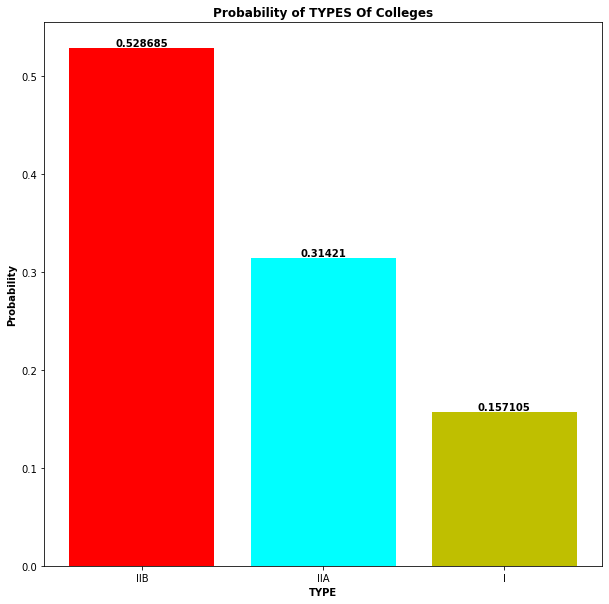

In [ ]:
## What is the likelihood of selecting certain types of colleges? (IIB,IIA,I)
aaup=pd.read_csv("/content/Aaupcsv.csv")
news1=pd.read_csv("/content/DN2 newscsv.csv")
final = pd.merge(aaup,news1, on='FICE (Federal ID number)')
final=final.drop(["COLLEGE NAME_y"],axis=1)
final=final.drop(["State (postal code)"],axis=1)
final
df=pd.DataFrame()
df["Type"]=final["Type  (I, IIA, or IIB)"]

df["IIB"]=np.where((df["Type"]=="IIB"),1,0)
df["IIA"]=np.where((df["Type"]=="IIA"),1,0)
df["I"]=np.where((df["Type"]=="I"),1,0)
iib=df["IIB"].sum()
iia=df["IIA"].sum()
i=df["I"].sum()
total=iia+iib+i

pro_iib=iib/total
pro_iia=iia/total
pro_i=i/total

label=["IIB","IIA","I"]
prob=[pro_iib,pro_iia,pro_i]

fig,ax=plt.subplots(figsize=(10,10))
bar=ax.bar(label,prob,color=["r","cyan","y"])
ax.set_xlabel("TYPE",fontweight='bold')
ax.set_ylabel("Probability",fontweight='bold')
ax.bar_label(bar,fontsize="10",fontweight='bold')
ax.set_title("Probability of TYPES Of Colleges",fontweight='bold')
plt.show()

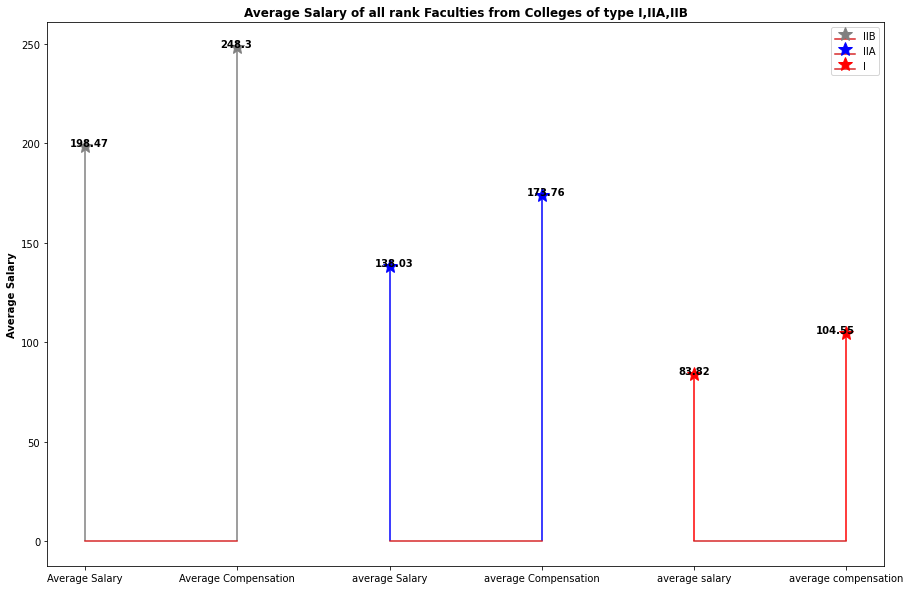

In [ ]:
## Which kind of colleges pay their faculty the highest average salaries and compensation?

aaup=pd.read_csv("/content/Aaupcsv.csv")
news1=pd.read_csv("/content/DN2 newscsv.csv")
final = pd.merge(aaup,news1, on='FICE (Federal ID number)')
final=final.drop(["COLLEGE NAME_y"],axis=1)
final=final.drop(["State (postal code)"],axis=1)
final
df=pd.DataFrame()
df["Type"]=final["Type  (I, IIA, or IIB)"]
df["AVG salary"]=final["Average salary - all ranks"]
df["AVG compensation"]=final["Average compensation - all ranks"]

df["IIB avg salary"]=np.where((df["Type"]=="IIB"),df["AVG salary"],0)
df["IIA avg salary"]=np.where((df["Type"]=="IIA"),df["AVG salary"],0)
df["I avg salary"]=np.where((df["Type"]=="I"),df["AVG salary"],0)

df["IIB avg compen"]=np.where((df["Type"]=="IIB"),df["AVG compensation"],0)
df["IIA avg compen"]=np.where((df["Type"]=="IIA"),df["AVG compensation"],0)
df["I avg compen"]=np.where((df["Type"]=="I"),df["AVG compensation"],0)

IIB_avg_salary=df["IIB avg salary"].mean()
IIA_avg_salary=df["IIA avg salary"].mean()
I_avg_salary=df["I avg salary"].mean()

IIB_avg_compen=df["IIB avg compen"].mean()
IIA_avg_compen=df["IIA avg compen"].mean()
I_avg_compen=df["I avg compen"].mean()


fig,ax=plt.subplots(figsize=(15,10))

markerline1, stemlines1, baseline1=ax.stem(["Average Salary","Average Compensation"],[IIB_avg_salary,IIB_avg_compen],label="IIB",markerfmt='*',linefmt='grey')
markerline2, stemlines2, baseline2=ax.stem(["average Salary","average Compensation"],[IIA_avg_salary,IIA_avg_compen],label="IIA",markerfmt='*',linefmt='blue')
markerline3, stemlines3, baseline3=ax.stem(["average salary","average compensation"],[I_avg_salary,I_avg_compen],label="I",markerfmt="*",linefmt='red',)
markerline1.set_markerfacecolor("grey")
markerline2.set_markerfacecolor("blue")
markerline3.set_markerfacecolor("r")

markerline1.set_markersize(15)
markerline2.set_markersize(15)
markerline3.set_markersize(15)

ax.text(-0.1,IIB_avg_salary , str(round(IIB_avg_salary,2)), color='black', fontweight='bold')
ax.text(0.89,IIB_avg_compen , str(round(IIB_avg_compen,2)), color='black', fontweight='bold')
ax.text(1.9,IIA_avg_salary , str(round(IIA_avg_salary,2)), color='black', fontweight='bold')
ax.text(2.9,IIA_avg_compen, str(round(IIA_avg_compen,2)), color='black', fontweight='bold')
ax.text(3.9,I_avg_salary , str(round(I_avg_salary,2)), color='black', fontweight='bold')
ax.text(4.8,I_avg_compen , str(round(I_avg_compen,2)), color='black', fontweight='bold')
ax.set_title("Average Salary of all rank Faculties from Colleges of type I,IIA,IIB",fontweight='bold')
ax.set_ylabel("Average Salary",fontweight='bold')
ax.legend()
plt.show()


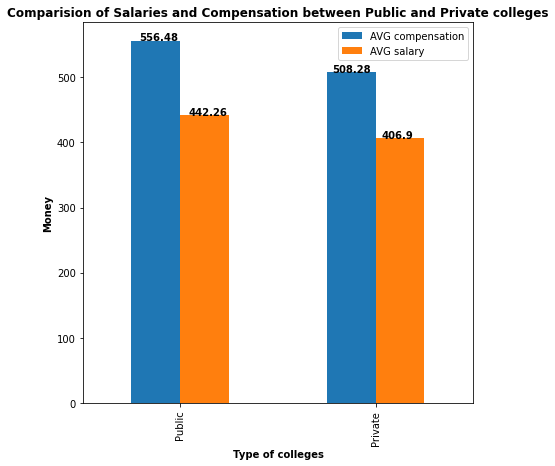

In [ ]:
## comparison of professor salaries and benefits at public and private institutions

aaup=pd.read_csv("/content/Aaupcsv.csv")
news1=pd.read_csv("/content/DN2 newscsv.csv")
final = pd.merge(aaup,news1, on='FICE (Federal ID number)')
final=final.drop(["COLLEGE NAME_y"],axis=1)
final=final.drop(["State (postal code)"],axis=1)
final

df=pd.DataFrame()
df["pub/private"]=final["PUB/PRIVATE"]
df["AVG salary"]=final["Average salary - all ranks"]
df["AVG compensation"]=final["Average compensation - all ranks"]
df1=df.pivot_table(index="pub/private",aggfunc="mean")
df1["Type of colleges"]=["Public","Private"]
df1=df1.set_index("Type of colleges")
df1

ax=df1.plot.bar(figsize=(7,7))
ax.set_ylabel("Money",fontweight="bold")
ax.set_xlabel("Type of colleges",fontweight="bold")
ax.set_title("Comparision of Salaries and Compensation between Public and Private colleges",fontweight="bold")
ax.text(1.03,df1["AVG salary"][1], str(round(df1["AVG salary"][1],2)), color='black', fontweight='bold')
ax.text(0.04,df1["AVG salary"][0], str(round(df1["AVG salary"][0],2)), color='black', fontweight='bold')
ax.text(-0.21,df1["AVG compensation"][0], str(round(df1["AVG compensation"][0],2)), color='black', fontweight='bold')
ax.text(0.78,df1["AVG compensation"][1], str(round(df1["AVG compensation"][1],2)), color='black', fontweight='bold')

plt.show()


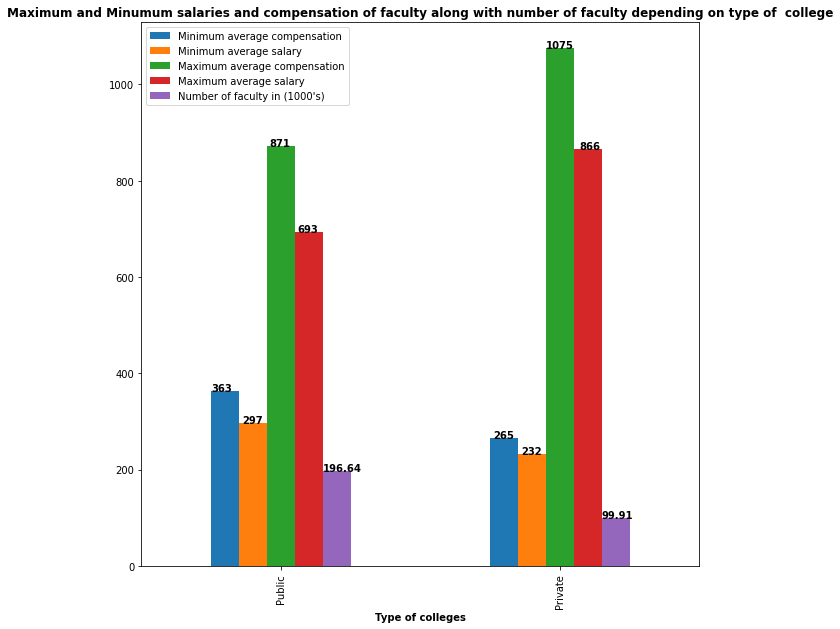

In [ ]:
## What are the highest and lowest faculty salaries, benefits, and staffing levels at public and private colleges?

aaup=pd.read_csv("/content/Aaupcsv.csv")
news1=pd.read_csv("/content/DN2 newscsv.csv")
final = pd.merge(aaup,news1, on='FICE (Federal ID number)')
final=final.drop(["COLLEGE NAME_y"],axis=1)
final=final.drop(["State (postal code)"],axis=1)
final

df=pd.DataFrame()
df["pub/private"]=final["PUB/PRIVATE"]
df["AVG salary"]=final["Average salary - all ranks"]
df["AVG compensation"]=final["Average compensation - all ranks"]
df
df1min=df.pivot_table(index="pub/private",aggfunc="min")



df2max=df.pivot_table(index="pub/private",aggfunc="max")
df2max
df3=pd.merge(df1min,df2max,on="pub/private")
df3



dftp=pd.DataFrame()
dftp["pub/private"]=final["PUB/PRIVATE"]
dftp["Number of faculty"]=final["Number of faculty - all ranks"]
dftp["Number of faculty"]=pd.to_numeric(dftp["Number of faculty"])
dftp["Number of faculty in (1000's)"]=dftp["Number of faculty"]/1000
dftp=dftp.drop(["Number of faculty"],axis=1)
dftp=dftp.pivot_table(index="pub/private",aggfunc="sum")


dffinal=pd.merge(df3,dftp, on="pub/private")


dffinal["Type of colleges"]=["Public","Private"]

dffinal=dffinal.set_index("Type of colleges")

dffinal.rename(columns={"AVG compensation_x":"Minimum average compensation","AVG salary_x":"Minimum average salary","AVG compensation_y":"Maximum average compensation","AVG salary_y":"Maximum average salary"},inplace=True)
ax=dffinal.plot.bar(figsize=(10,10))
ax.set_xlabel("Type of colleges",fontweight="bold")
ax.set_title("Maximum and Minumum salaries and compensation of faculty along with number of faculty depending on type of  college",fontweight="bold")
ax.text(0.76,dffinal["Minimum average compensation"][1], str(round(dffinal["Minimum average compensation"][1],2)), color='black', fontweight='bold')
ax.text(0.86,dffinal["Minimum average salary"][1], str(round(dffinal["Minimum average salary"][1],2)), color='black', fontweight='bold')
ax.text(0.95,dffinal["Maximum average compensation"][1], str(round(dffinal["Maximum average compensation"][1],2)), color='black', fontweight='bold')
ax.text(1.07,dffinal["Maximum average salary"][1], str(round(dffinal["Maximum average salary"][1],2)), color='black', fontweight='bold')
ax.text(1.15,dffinal["Number of faculty in (1000's)"][1], str(round(dffinal["Number of faculty in (1000's)"][1],2)), color='black', fontweight='bold')


ax.text(-0.25,dffinal["Minimum average compensation"][0], str(round(dffinal["Minimum average compensation"][0],2)), color='black', fontweight='bold')
ax.text(-0.14,dffinal["Minimum average salary"][0], str(round(dffinal["Minimum average salary"][0],2)), color='black', fontweight='bold')
ax.text(-0.04,dffinal["Maximum average compensation"][0], str(round(dffinal["Maximum average compensation"][0],2)), color='black', fontweight='bold')
ax.text(0.06,dffinal["Maximum average salary"][0], str(round(dffinal["Maximum average salary"][0],2)), color='black', fontweight='bold')
ax.text(0.15,dffinal["Number of faculty in (1000's)"][0], str(round(dffinal["Number of faculty in (1000's)"][0],2)), color='black', fontweight='bold')
plt.show()


In [ ]:
##  What is the distribution of the entire faculty according to Salary range?

aaup=pd.read_csv("/content/Aaupcsv.csv")
news1=pd.read_csv("/content/DN2 newscsv.csv")
final = pd.merge(aaup,news1, on='FICE (Federal ID number)')
final=final.drop(["COLLEGE NAME_y"],axis=1)
final=final.drop(["State (postal code)"],axis=1)


df=pd.DataFrame()

df["Number of faculty"]=final["Number of faculty - all ranks"]
df["Number of faculty"]=pd.to_numeric(df["Number of faculty"])

df["AVG Salary"]=final["Average salary - all ranks"]

df["salary range"]=pd.cut(df["AVG Salary"],bins=list(range(0,1000,50)))

df=df.pivot_table(index=df["salary range"],aggfunc=sum)
df=df.drop(["AVG Salary"],axis=1)
df=df[df["Number of faculty"]!=0]


df



,Number of faculty
salary range,
"(200, 250]",74
"(250, 300]",3765
"(300, 350]",16873
"(350, 400]",36950
"(400, 450]",56901
"(450, 500]",53733
"(500, 550]",57984
"(550, 600]",38224
"(600, 650]",19198
